In [2]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [4]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Downloads\Dataset/Train'
valid_path = 'Downloads\Dataset/Test'

In [5]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

mobilnet = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

80150528/80134624 [==============================] - 19s 0us/step


In [6]:
# don't train existing weights
for layer in mobilnet.layers:
    layer.trainable = False

In [14]:
# useful for getting number of output classes
folders = glob('Downloads\Dataset/Train/*')

In [15]:
folders

['Downloads\\Dataset/Train\\Parasite', 'Downloads\\Dataset/Train\\Uninfected']

In [16]:
# our layers - you can add more if you want
x = Flatten()(mobilnet.output)

In [17]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=mobilnet.input, outputs=prediction)

In [18]:
# view the structure of the model
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [19]:
from tensorflow.keras.layers import MaxPooling2D

In [20]:
### Create Model from scratch using CNN
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation ="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dense(2,activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 16)      208       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      2080      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        8256      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 64)       0

In [21]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [22]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [24]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Downloads\Dataset/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 416 images belonging to 2 classes.


In [25]:
training_set

In [27]:
test_set = test_datagen.flow_from_directory('Downloads\Dataset/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 134 images belonging to 2 classes.


In [39]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\raghu\AppData\Local\Temp/ipykernel_16448/4102162479.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/50
13/13 [==============================] - 19s 1s/step - loss: 0.3270 - accuracy: 0.8462 - val_loss: 0.4421 - val_accuracy: 0.8060
Epoch 2/50
13/13 [==============================] - 16s 1s/step - loss: 0.2859 - accuracy: 0.9062 - val_loss: 0.5801 - val_accuracy: 0.6716
Epoch 3/50
13/13 [==============================] - 16s 1s/step - loss: 0.2263 - accuracy: 0.9135 - val_loss: 0.5402 - val_accuracy: 0.7090
Epoch 4/50
13/13 [==============================] - 19s 1s/step - loss: 0.2109 - accuracy: 0.9207 - val_loss: 1.0043 - val_accuracy: 0.5597
Epoch 5/50
13/13 [==============================] - 17s 1s/step - loss: 0.3148 - accuracy: 0.8654 - val_loss: 0.5495 - val_accuracy: 0.7015
Epoch 6/50
13/13 [==============================] - 23s 2s/step - loss: 0.2282 - accuracy: 0.9111 - val_loss: 0.6565 - val_accuracy: 0.7015
Epoch 7/50
13/13 [==============================] - 23s 2s/step - loss: 0.1510 - accuracy: 0.9471 - val_loss: 0.5050 - val_accuracy: 0.7612
Epoch 8/50
13/13 [==

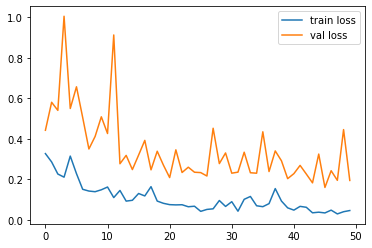

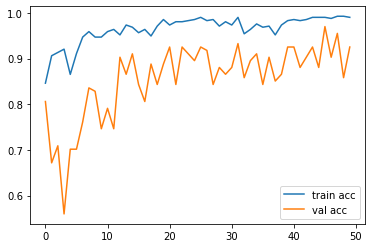

<Figure size 432x288 with 0 Axes>

In [40]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [67]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_Malaria.h5')

In [68]:
y_pred = model.predict(test_set)

In [69]:
y_pred

array([[1.00000000e+00, 8.50672145e-17],
       [9.99865294e-01, 1.34671209e-04],
       [9.99822795e-01, 1.77270398e-04],
       [9.98893917e-01, 1.10611611e-03],
       [1.41020799e-02, 9.85897899e-01],
       [9.99741733e-01, 2.58297106e-04],
       [2.06213240e-02, 9.79378760e-01],
       [4.58855629e-01, 5.41144371e-01],
       [9.99981523e-01, 1.84991368e-05],
       [6.84514105e-01, 3.15485954e-01],
       [9.99988794e-01, 1.11768659e-05],
       [6.16594777e-02, 9.38340545e-01],
       [9.99512196e-01, 4.87765530e-04],
       [7.27472007e-02, 9.27252829e-01],
       [3.28094102e-02, 9.67190564e-01],
       [2.14220528e-02, 9.78577971e-01],
       [1.00000000e+00, 1.45526224e-09],
       [9.99192297e-01, 8.07738397e-04],
       [9.99841690e-01, 1.58265291e-04],
       [8.72569717e-03, 9.91274297e-01],
       [6.14311874e-01, 3.85688156e-01],
       [1.87302977e-02, 9.81269717e-01],
       [1.11564279e-01, 8.88435662e-01],
       [2.30217818e-03, 9.97697771e-01],
       [9.959263

In [70]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [71]:
y_pred

array([0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0], dtype=int64)

In [1]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [3]:
model=load_model('model_Malaria.h5')

In [13]:
img=image.load_img('Downloads/Dataset/Test/Parasite/3.png', target_size=(224,224))

In [14]:
x=image.img_to_array(img)
x

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [15]:
x.shape

(224, 224, 3)

In [16]:
x=x/255

In [17]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [18]:
model.predict(img_data)

array([[0., 1.]], dtype=float32)

In [19]:
a=np.argmax(model.predict(img_data), axis=1)

In [20]:
if(a==1):
    print("Uninfected")
else:
    print("Infected")

Uninfected


In [21]:
a

array([1], dtype=int64)